In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import samplerate
from scipy.io import wavfile

# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
# import graphviz

from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from IPython.display import display, Math, Markdown
from sklearn.linear_model import SGDRegressor, LinearRegression, Lasso, Ridge
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
dataset = pd.read_csv("Punch1.csv", header = 0)
dataset

t = dataset.loc[:,"seconds_elapsed"]
X = dataset.loc[:,"accelerationX"]
Y = dataset.loc[:,"accelerationY"]
Z = dataset.loc[:,"accelerationZ"]

Rx = dataset.loc[:,"rotationRateX"]
Ry = dataset.loc[:,"rotationRateY"]
Rz = dataset.loc[:,"rotationRateZ"]

print("t has dimensions {}".format(t.shape))
print("X has dimensions {}".format(X.shape))
print("Y has dimensions {}".format(Y.shape))
print("Z has dimensions {}".format(Z.shape))

print("Rx has dimensions {}".format(Rx.shape))
print("Ry has dimensions {}".format(Ry.shape))
print("Rz has dimensions {}".format(Rz.shape))

t has dimensions (605,)
X has dimensions (605,)
Y has dimensions (605,)
Z has dimensions (605,)
Rx has dimensions (605,)
Ry has dimensions (605,)
Rz has dimensions (605,)


In [21]:
X = np.reshape(X,(-1,1))
Y = np.reshape(Y,(-1,1))
Z = np.reshape(Z,(-1,1))
t = np.reshape(t,(-1,1))

Rx = np.reshape(Rx,(-1,1))
Ry = np.reshape(Ry,(-1,1))
Rz = np.reshape(Rz,(-1,1))

print("t has dimensions {}".format(t.shape))
print("X has dimensions {}".format(X.shape))
print("Y has dimensions {}".format(Y.shape))
print("Z has dimensions {}".format(Z.shape))

print("Rx has dimensions {}".format(Rx.shape))
print("Ry has dimensions {}".format(Ry.shape))
print("Rz has dimensions {}".format(Rz.shape))

t has dimensions (605, 1)
X has dimensions (605, 1)
Y has dimensions (605, 1)
Z has dimensions (605, 1)
Rx has dimensions (605, 1)
Ry has dimensions (605, 1)
Rz has dimensions (605, 1)


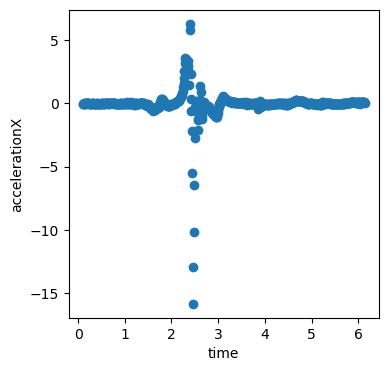

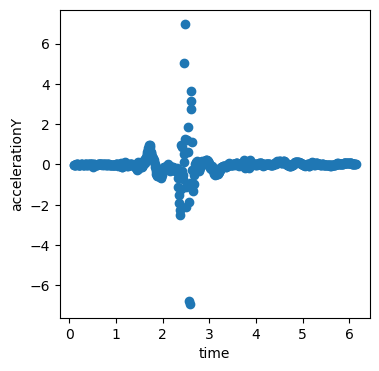

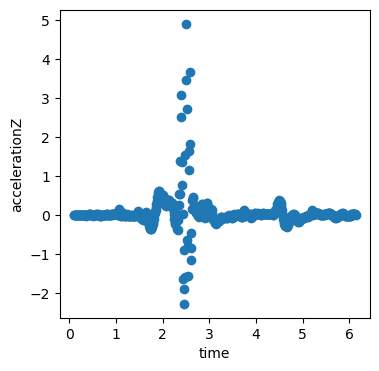

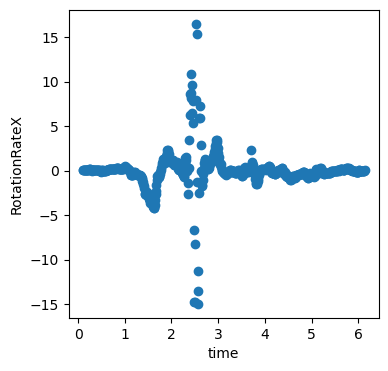

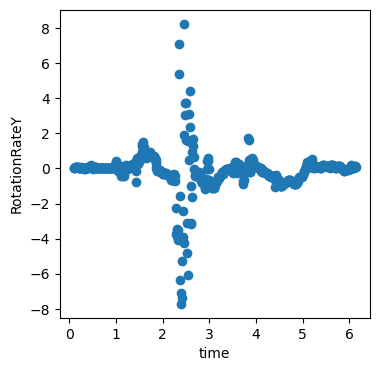

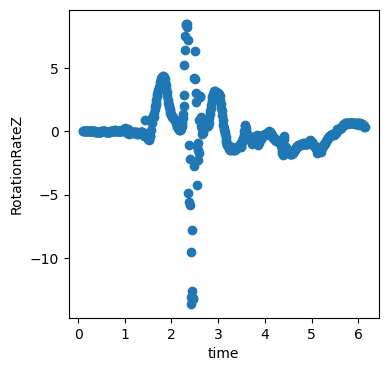

In [22]:
fig = plt.figure(figsize=(4,4))
plt.scatter(t, X)
plt.xlabel('time')
plt.ylabel('accelerationX')
plt.show()

fig = plt.figure(figsize=(4,4))
plt.scatter(t, Y)
plt.xlabel('time')
plt.ylabel('accelerationY')
plt.show()

fig = plt.figure(figsize=(4,4))
plt.scatter(t, Z)
plt.xlabel('time')
plt.ylabel('accelerationZ')
plt.show()

fig = plt.figure(figsize=(4,4))
plt.scatter(t, Rx)
plt.xlabel('time')
plt.ylabel('RotationRateX')
plt.show()

fig = plt.figure(figsize=(4,4))
plt.scatter(t, Ry)
plt.xlabel('time')
plt.ylabel('RotationRateY')
plt.show()

fig = plt.figure(figsize=(4,4))
plt.scatter(t, Rz)
plt.xlabel('time')
plt.ylabel('RotationRateZ')
plt.show()

In [33]:
# Trim the data

flat = 0
for k in range(len(t)):
    if (np.sqrt(math.pow(X[k], 2) + math.pow(Y[k], 2) + math.pow(Z[k], 2))) < 0.25:
        flat = flat + 1
tt = t[flat:]
Xt = X[flat:]
Yt = Y[flat:]
Zt = Z[flat:]

flat = 0
for k in range(len(t)):
    if (np.sqrt(math.pow(X[len(t)-k-1], 2) + math.pow(Y[len(t)-k-1], 2) + math.pow(Z[len(t)-k-1], 2))) < 0.25:
        flat = flat + 1
tt = tt[:len(t)-flat]
Xt = Xt[:len(t)-flat]
Yt = Yt[:len(t)-flat]
Zt = Zt[:len(t)-flat]

print("tt has dimensions {}".format(tt.shape))
print("Xt has dimensions {}".format(Xt.shape))
print("Yt has dimensions {}".format(Yt.shape))
print("Zt has dimensions {}".format(Zt.shape))

tt has dimensions (190, 1)
Xt has dimensions (190, 1)
Yt has dimensions (190, 1)
Zt has dimensions (190, 1)


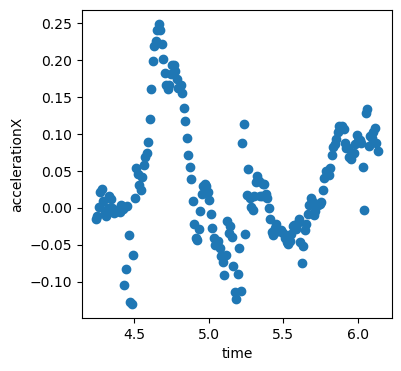

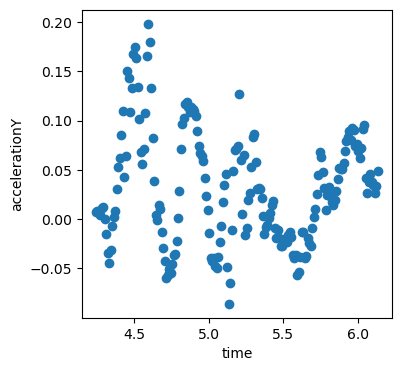

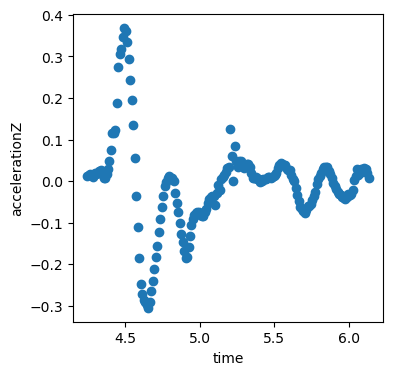

In [34]:
fig = plt.figure(figsize=(4,4))
plt.scatter(tt, Xt)
plt.xlabel('time')
plt.ylabel('accelerationX')
plt.show()

fig = plt.figure(figsize=(4,4))
plt.scatter(tt, Yt)
plt.xlabel('time')
plt.ylabel('accelerationY')
plt.show()

fig = plt.figure(figsize=(4,4))
plt.scatter(tt, Zt)
plt.xlabel('time')
plt.ylabel('accelerationZ')
plt.show()

In [35]:
#Normalise the data to be an array of length 100

tr = samplerate.resample(tt,100/tt.shape[0], 'linear')  
Xr = samplerate.resample(Xt,100/Xt.shape[0], 'sinc_best')  
Yr = samplerate.resample(Yt,100/Yt.shape[0], 'sinc_best')  
Zr = samplerate.resample(Zt,100/Zt.shape[0], 'sinc_best')  

print("tt has dimensions {}".format(tr.shape))
print("Xr has dimensions {}".format(Xr.shape))
print("Yt has dimensions {}".format(Yr.shape))
print("Zt has dimensions {}".format(Zr.shape))

tt has dimensions (100, 1)
Xr has dimensions (100, 1)
Yt has dimensions (100, 1)
Zt has dimensions (100, 1)


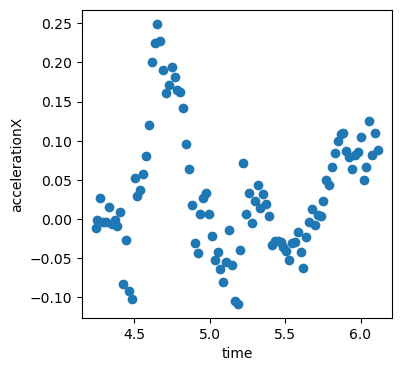

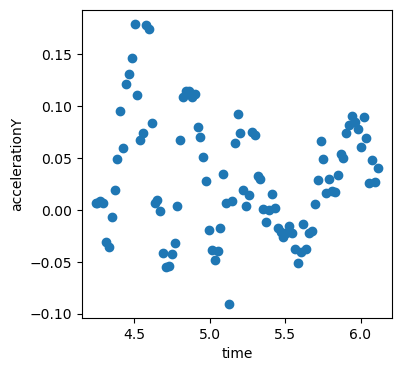

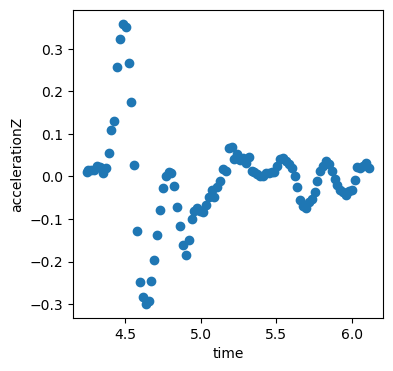

In [36]:
fig = plt.figure(figsize=(4,4))
plt.scatter(tr, Xr)
plt.xlabel('time')
plt.ylabel('accelerationX')
plt.show()

fig = plt.figure(figsize=(4,4))
plt.scatter(tr, Yr)
plt.xlabel('time')
plt.ylabel('accelerationY')
plt.show()

fig = plt.figure(figsize=(4,4))
plt.scatter(tr, Zr)
plt.xlabel('time')
plt.ylabel('accelerationZ')
plt.show()

In [38]:
# fig = plt.figure(figsize=(4,4))
# plt.scatter(Xr, Yr)
# plt.xlabel('accelerationX')
# plt.ylabel('accelerationY')
# plt.show()

# fig = plt.figure(figsize=(4,4))
# plt.scatter(Xr, Zr)
# plt.xlabel('accelerationX')
# plt.ylabel('accelerationZ')
# plt.show()

# fig = plt.figure(figsize=(4,4))
# plt.scatter(Yr, Zr)
# plt.xlabel('accelerationY')
# plt.ylabel('accelerationZ')
# plt.show()

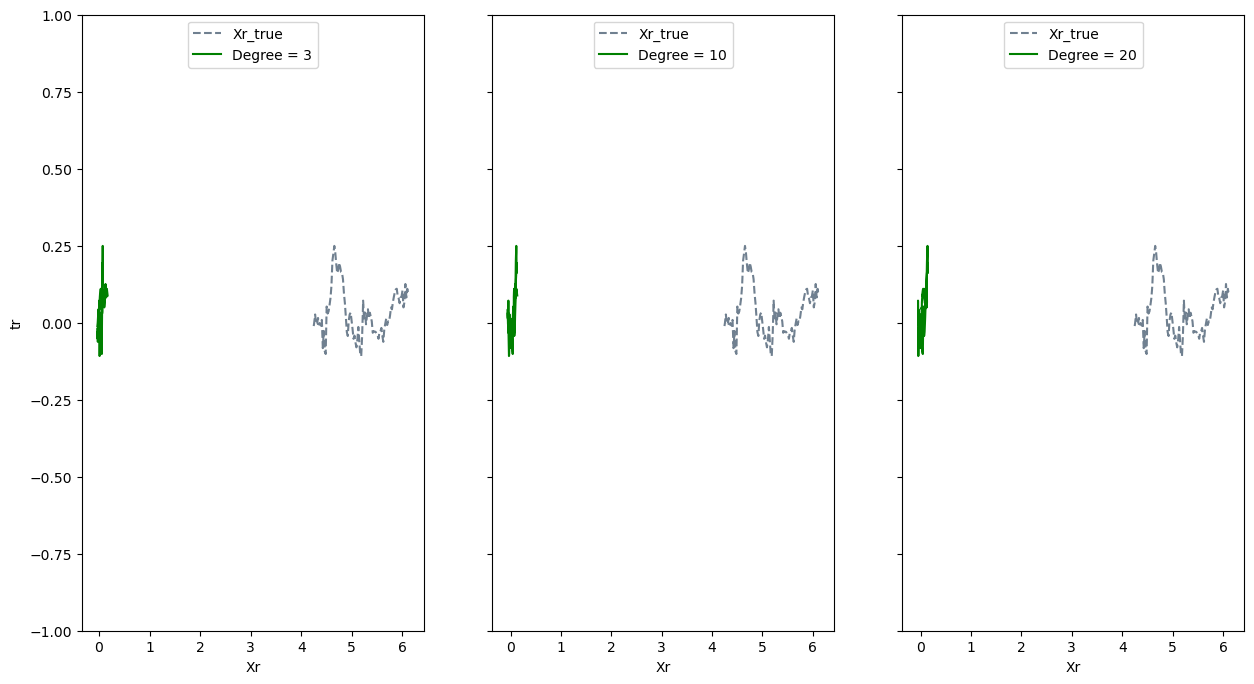

In [47]:
fig, axes = plt.subplots(1, 3,figsize=(15,8), sharey=True)
coefs = {}
for i, degree in enumerate([3, 10, 20]):
    
    axes[i].plot(tr, Xr, color='slategrey', linestyle='--', label='Xr_true')

    # Generate polynomial features from training data
    poly = make_pipeline(StandardScaler(with_mean=False), PolynomialFeatures(degree=degree, include_bias=False))
    T_poly = poly.fit_transform(tr)

    # Define linear model with no regularization
    poly_reg = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
    
    # Fit linear model to training data
    poly_reg.fit(T_poly, Xr)
    
    coefs['{}'.format(degree)] = poly_reg.named_steps['linearregression'].coef_
    
    # Predict on X to generate curve
    X_hat_poly = poly_reg.predict(poly.transform(tr))
    
    axes[i].plot(X_hat_poly, Xr, color='g', label='Degree = {}'.format(degree))
    
    axes[i].set_xlabel('Xr')
    axes[i].set_ylim(-1, 1)
    
    axes[i].legend(loc='upper center')
    
axes[0].set_ylabel('tr')  
plt.show()   

In [ ]:
poly = make_pipeline(StandardScaler(with_mean=False), PolynomialFeatures(degree=25, include_bias=False))
X_poly = poly.fit_transform(X)

l1_reg = make_pipeline(StandardScaler(with_mean=False), Lasso(alpha=0.1, max_iter=10000))
X_lasso = l1_reg.fit(X_poly, t)

rf = RandomForestClassifier()
rf.fit(t, X)
X_pred = rf.predict(t)

accuracy = accuracy_score(X, X_pred)
print("Accuracy:", accuracy)

fig = plt.figure(figsize=(4,4))

# Plot ground truth data
plt.plot(t, X, label='True function', color='slategrey', linestyle='--')

# Plot predicted regression curves
plt.plot(t, X_pred)

plt.xlabel('t')
plt.ylabel('X')
plt.legend()
plt.show()